# Linear Regression (Self Made)

### 1. Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics

### 2. Data Preprocessing

In [2]:
data = load_boston()

X, y = data['data'], data['target']

u = np.mean(X,axis=0)
std = np.std(X,axis=0)
# Normalise the Data
X = (X-u)/std

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Y_train = Y_train.reshape((1, Y_train.shape[0]))
Y_test = Y_test.reshape((1, Y_test.shape[0]))

## stacking the input with ones
ones_extra = np.ones((X_train.shape[0], 1))
X_train = np.hstack((ones_extra, X_train))
X_train = X_train.T

ones_extra = np.ones((X_test.shape[0], 1))
X_test = np.hstack((ones_extra, X_test))
X_test = X_test.T

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(14, 379) (14, 127) (1, 379) (1, 127)


### 3. Intialization and Setup

In [3]:

def predict(X, w):
    return np.dot(w, X)

def mse_loss(y, y_pred, m, lam, w):
    
    loss = np.sum((y_pred - y)**2 ) + lam * np.sum(np.square(w))
    
    return loss/m
    
def gradient(y, y_pred, X, lam, w, m):
    
    grad = np.dot( y_pred - y, X.T) + lam * w
    
    return grad/m


def score(y, y_pred):
    
    y = y.reshape((y.shape[1],))
    y_pred = y_pred.reshape((y_pred.shape[1],))
    

    return r2_score(y, y_pred)

def train(epochs, lr):
    
    losses = []
    train_acc = []
    valid_acc = []
    w = np.zeros((1, X_train.shape[0]))
    
    k = 5
    s = 0
    e = k
    tot = X_train.shape[1]
    m = X_train.shape[1]
    lam = 0.5
    
    for i in range(epochs):
        
        s = min(s, m - 1)
        e = min(e, m - 1)
        
        #applying cross validation
        X_valid = X_train[:, s : e]
        X_t = np.hstack((X_train[:,0 : s], X_train[:, e : tot - 1]))
        
        Y_valid = Y_train[:, s : e]
        Y_t = np.hstack((Y_train[:, 0 : s], Y_train[:, e : tot - 1]))
        
        m = X_t.shape[1]
        
        y_pred = predict(X_t, w)
        y_pred_valid = predict(X_valid, w)
        #computing the losses
        loss = mse_loss(Y_t, y_pred, m, lam, w)
        
        losses.append(loss)
        
        #finding the gradient value for the weight change
        
        grad = gradient(Y_t, y_pred, X_t, lam, w, m)
        
        #updating the weights
        w = w - (lr) * (grad)
    
        train_score = score(Y_t, y_pred)
        
        train_acc.append(train_score)
        
        valid_score = score(Y_valid, y_pred_valid)
        
        valid_acc.append(valid_score)
        
        
        if i % 1000 == 0:
            
            print("The training accuracy : {} The validation accuracy: {}".format(train_score, valid_score))
            
            
    
    return w, losses, train_acc
        
        
        
    
    

### 6. Training

In [4]:
w, losses, train_acc = train(epochs = 15000, lr = 0.01)

The training accuracy : -5.950279682117007 The validation accuracy: -5.133223890528107
The training accuracy : 0.7421359141644075 The validation accuracy: 0.818234273873686
The training accuracy : 0.7437811932489373 The validation accuracy: 0.8445619787799525
The training accuracy : 0.744112067217449 The validation accuracy: 0.8545944855063334
The training accuracy : 0.7442083927325758 The validation accuracy: 0.8590997214584362
The training accuracy : 0.744239360774374 The validation accuracy: 0.8613318087971629
The training accuracy : 0.7442501661859123 The validation accuracy: 0.8624869525585148
The training accuracy : 0.7442543095135956 The validation accuracy: 0.8630958706286629
The training accuracy : 0.7442560592222174 The validation accuracy: 0.8634193911911188
The training accuracy : 0.7442568619248402 The validation accuracy: 0.8635918789510277
The training accuracy : 0.7442572532145664 The validation accuracy: 0.863683989977389
The training accuracy : 0.7442574516229008 The 

### 7. Predictions and Scoring

In [5]:
y_ = predict(X_test, w)

Y_test = Y_test.reshape((Y_test.shape[1],))
y_ = y_.reshape((y_.shape[1],))

testing_acc = r2_score(Y_test, y_)

print("Average Testing accuracy: {}".format(testing_acc))

Average Testing accuracy: 0.6838358472920477




### 8. Plotting

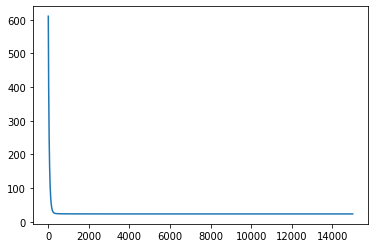

In [6]:
plt.plot(losses)
plt.show()

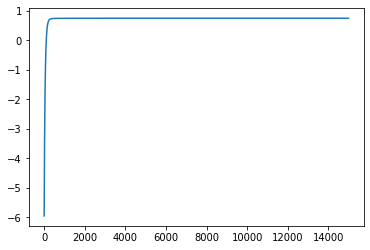

In [7]:
#training accuracy
plt.plot(train_acc)
plt.show()